In [1]:
import requests
from bs4 import BeautifulSoup
import re
import time
import pandas as pd
import numpy as np

In [2]:
categories = ['EDUCATION', 'BUSINESS', 
       'DATING', 'SPORTS', 
       'WEATHER', 'FOOD_AND_DRINK', 
       'HEALTH_AND_FITNESS', 'BEAUTY', 
       'MUSIC_AND_AUDIO', 'NEWS_AND_MAGAZINES', 
       'SOCIAL', 'SHOPPING', 
       'PRODUCTIVITY', 'PHOTOGRAPHY', 
       'MEDICAL', 'PARENTING', 
       'EDUCATION', 'BEAUTY',
       'COMMUNICATION', 'TOOLS']

In [ ]:
def get_links(data):
    '''Given html data this will extract all the links'''
    link_list = []
    for link in data.findAll('a'):
        get_link = link.get('href')
        link_list.append(get_link)
    return link_list

In [ ]:
def webpage_html(url):
    r = requests.get(url)
    html = r.text
    return html

In [ ]:
def google_scraper(categories):
    '''Will cycle through every category and then request the site, pass the soup to 
        get_links and then clean the list and append results to a new list in a dict
        format that has the format of {cat_name : [link list]}'''
    dicty = dict()
    for category in categories:
        url = f'https://play.google.com/store/apps/category/{category}/collection/topselling_free'
        html = webpage_html(url)
        soup = BeautifulSoup(html)
        links = get_links(soup)
        del links[0:107]
        clean = list(set(links))
        new_list = [app for app in clean if app.find('details') != -1]
        dicty[category] = new_list
        time.sleep(3)
    return dicty


In [3]:
cat = categories

In [ ]:
stuff = google_scraper(cat)

In [ ]:
stuff

In [ ]:
def parse(listing_html, criteria):
    result = listing_html.find(class_=re.compile(r'.*%s' % criteria))
    if result:
        return result.text

In [ ]:
def get_description(category_dict):
    dicty = dict()
    url = 'https://play.google.com'
    for category, link_list in category_dict.items():
        listy = list()
        for link in link_list:
            html = webpage_html(url+link)
            soup = BeautifulSoup(html)
            html1 = soup.find('div', {'class':"LXrl4c"})
            description = parse(html1, 'DWPxHb')
            time.sleep(1)
            listy.append(description)
        dicty[category] = listy
    return dicty              

In [4]:
all_desc = get_description(stuff)

NameError: name 'get_description' is not defined

In [5]:
# # Save
# np.save('my_file.npy', all_desc) 

# # # Load
read_dictionary = np.load('my_file.npy').item()

In [8]:
edu  = read_dictionary

In [9]:
read_dictionary.keys()

dict_keys(['EDUCATION', 'BUSINESS', 'DATING', 'SPORTS', 'WEATHER', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'BEAUTY', 'MUSIC_AND_AUDIO', 'NEWS_AND_MAGAZINES', 'SOCIAL', 'SHOPPING', 'PRODUCTIVITY', 'PHOTOGRAPHY', 'MEDICAL', 'PARENTING', 'COMMUNICATION', 'TOOLS'])

In [10]:
import nltk
import sklearn

from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
from nltk.stem.snowball import SnowballStemmer

In [11]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

In [12]:
# stop words
from nltk.corpus import stopwords
stopwords.words("english")

stop_words = set(stopwords.words('english'))

In [13]:
# stem words
stemmer = SnowballStemmer("english")

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [18]:
def text_cleaner(review):   
    art_tokens_raw = nltk.regexp_tokenize(review, pattern)
    art_tokens = [i.lower() for i in art_tokens_raw]
    art_tokens_stopped = [w for w in art_tokens if not w in stop_words]
    art_stemmed = [stemmer.stem(word) for word in art_tokens_stopped]
    cleaned = ' '.join(art_stemmed)
    return cleaned

In [19]:
def dict_cleaner(dictionary):
    review_list = []
    for c, d in dictionary.items():
        for review in d:
            cleaned = text_cleaner(review)
            review_list.append(cleaned)
    return review_list

In [20]:
review_list = dict_cleaner(edu)

In [23]:
response = tfidf.fit_transform(review_list)

df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())


In [24]:
x = read_dictionary.keys()
new_list = []
for c in x: 
    s = [c] * 60
    new_list += s

In [25]:
len(new_list)

1080

In [26]:
df.shape

(1080, 13205)

In [27]:
df['labels'] = new_list

In [28]:
df.tail()

,aa,aac,aaptiv,aarp,aask,ab,abajo,abandon,abc,abcmous,...,zoomterrain,zoomwithushav,zoosk,zte,zulili,zulu,zulufor,zulupermiss,zumba,labels
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOOLS
1076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOOLS
1077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOOLS
1078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOOLS
1079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOOLS


In [68]:
df.describe()

,aa,aac,aaptiv,aarp,aask,ab,abajo,abandon,abc,abcmous,...,zoompres,zoomterrain,zoomwithushav,zoosk,zte,zulili,zulu,zulufor,zulupermiss,zumba
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.000033,0.000234,0.000172,0.000068,0.000062,0.001763,0.000017,0.000144,0.001015,0.000834,...,0.000108,0.000056,0.000108,0.000713,0.000037,0.000225,0.000169,0.000038,0.000064,0.000077
std,0.001082,0.003569,0.005640,0.002229,0.002038,0.018597,0.000570,0.004748,0.013862,0.022827,...,0.003540,0.001843,0.003540,0.023415,0.001212,0.007396,0.003225,0.001261,0.002107,0.002537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.035569,0.066420,0.185352,0.073265,0.066988,0.349607,0.018718,0.156044,0.387101,0.730989,...,0.116346,0.060580,0.116346,0.769504,0.039817,0.243071,0.071782,0.041430,0.069259,0.083370


In [61]:
new_desc = """Find your next commercial real estate deal on the go! Leverage the power of LoopNet anytime, anywhere to find your perfect investment property or lease space right from your Android device. Whether in the office or on the road, the LoopNet app keeps you productive, informed, and ahead of the competition with these features:

• Advanced Search Filters: Find the properties that meet your exact needs using specific search criteria and filtering options.
• Comprehensive Property Details: View listing details including property data, photos, videos, financials, map location, satellite images, and street view. See something you like? Contact the broker right from your phone!
• Map or List Based Search: Customize your search experience. Display and adjust your search results on a map, a list, or both.
• Saved Searches & Notifications: Save searches that matter so you can access them quickly and monitor your market day-to-day. We’ll also keep you notified about new listings that match your saved search criteria.
• Watch List & Notifications: Monitor listings of interest by adding them to your Watch List. We’ll notify you as soon as there are any changes or updates to the listings.
• Multiple Device Capability: Access your saved searches and watched listings from any device or on the web through your LoopNet account.

LoopNet is the industry leader with more traffic, listings, and geographic coverage than any other commercial real estate marketplace. Use the LoopNet app to find your next investment property or space to rent, whether office space, multifamily apartment buildings, retail, restaurant, medical, industrial, or land in all major markets in the United States and Canada including Los Angeles, New York, Chicago, San Francisco, Dallas, Houston, and Miami. """

In [62]:
x_trial = text_cleaner(new_desc)

In [63]:
x_vect = tfidf.transform([x_trial])

In [64]:
x_trial[:100]

'find next commerci real estat deal go leverag power loopnet anytim anywher find perfect invest prope'

In [65]:
dffff = pd.DataFrame(x_vect.toarray(), columns=tfidf.get_feature_names())

In [36]:
# ROC CURVE FOR MODELS AND OTHERS SHOWING PREFORMANCE, 
# TEXT RELATED VIZUALISATIONS LIKE WORD CLOUD, LATENT SEMANTIC ANALYSIS
# FEATURE IMPORTANCE ON RF, NB
# CREATE VIZ OF ENSEMBLE MODELS
# TYING SPECIFIC 

# Test-Train Split

In [37]:
y = df.labels

In [38]:
X = df.iloc[:,:-1]

In [39]:
# Sample code
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# TPOT for automated model selection

In [40]:
from tpot import TPOTClassifier

In [ ]:
config = {
    'sklearn.naive_bayes.MultinomialNB': {
        'alpha': [1e-3, 1e-2, 1e-1, 1., 10., 100.],
        'fit_prior': [True, False]
    },
    'sklearn.svm.LinearSVC' : {
        'C' : [1, 5, 10, 15, 20, 25],
        'dual' : [True, False],
        'loss' : ["squared_hinge", "hinge" ],
        'penalty' : ['l1', 'l2']
    },
    'sklearn.neighbors.KNeighborsClassifier' : {
    },
    'sklearn.ensemble.RandomForestClassifier' : {
        
    }
}

In [94]:
# Changed generation and population parameters to get better results
tpot = TPOTClassifier(generations=5, cv = 3 ,population_size=50,\
                      max_eval_time_mins=10, verbosity=3)

In [ ]:
tpot.fit(X_train, y_train)

In [ ]:
tpot.export('class4-pipeline.py')

In [ ]:
# 0.8009259259259259 First pipeline trial
# 0.8055555555555556 Second pipeline trial
# 0.7685185185185185 Third Pipeline trial

In [41]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier


In [100]:
last = LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.1)

In [43]:
last.fit(X_train, y_train)

LinearSVC(C=10.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.1,
     verbose=0)

In [66]:
last.predict(dffff)

array(['BUSINESS'], dtype=object)

In [ ]:
svc1 = LinearSVC(C=25.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.001)

In [ ]:
svc2 = LinearSVC(C=1.0, dual=True, loss="hinge", penalty="l2", tol=1e-05)

In [ ]:
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features=0.2, min_samples_leaf=3, min_samples_split=15, n_estimators=100, subsample=0.25)

# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model = VotingClassifier(estimators=[('svc1', svc1), 
                                     ('svc2', svc2),
                                     ('gb_clf', gb_clf),
                                    ('nb', nb_classifier),
                                    ('knn', knn),
                                    ('rf', rf_classifier)], voting='hard')

In [ ]:
import joblib

In [ ]:
# model1 with: svc1, svc2, last, gb_clf, nb, knn, rf
# model2 with: svc1, svc2, gb_clf, nb, knn, rf
# last -> SVC model 
#         LinearSVC(C=10.0, dual=False, loss="squared_hinge", penalty="l2", tol=0.1)

model.fit(X_train, y_train)

# model1 => 0.8101851851851852 <- voting
# model2 => 0.8148148148148148 <-voting
# last => 0.8194444444444444 <-svc

In [ ]:
# To Store Models:
# joblib.dump(model, 'model2')


# To load model
# model1 = joblib.load('model1')

# Random Forest and others

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score

In [79]:
knn = KNeighborsClassifier()

# Naive-Bayes Multinomial Classifier

In [ ]:
nb_classifier = MultinomialNB()

In [ ]:
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))

# Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=50)

rf_classifier.fit(X_train, y_train)
rf_train_preds = rf_classifier.predict(X_train)
rf_test_preds = rf_classifier.predict(X_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

# PCA experiment

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(.95)

In [74]:
new_train = pca.fit_transform(X_train)
new_test = pca.transform(X_test)

In [95]:
tpot.fit(new_train, y_train)

30 operators have been imported by TPOT.




TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [87]:
tpot.export('pca2.py')

True

In [88]:
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
exported_pipeline = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.5, min_samples_leaf=3, min_samples_split=7, n_estimators=100)

In [90]:
exported_pipeline.fit(new_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
exported_pipeline.score(new_test, y_test)

0.7870370370370371

# Pretty

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.figure(figsize=(50,50))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [137]:
preds = last.predict(X_test)

In [138]:
cm = confusion_matrix(y_test, preds)

In [142]:
cate = edu.keys()

Confusion matrix, without normalization
[[14  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  1  0  0  0  0  1  0  2  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  8  0  0  0  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1 15  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  1  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0 13  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0  0  3  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  4  1  0  0  0  0  0  0  1  0  0  0  7  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0]
 [ 1  1  0  0  0  0  1  0  0  0  1  0  1  0  0  

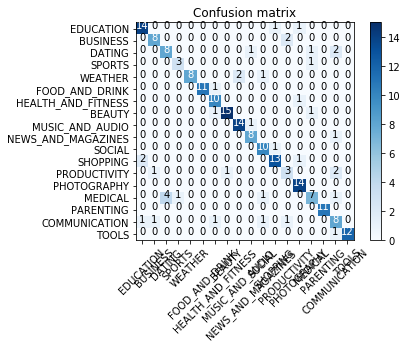

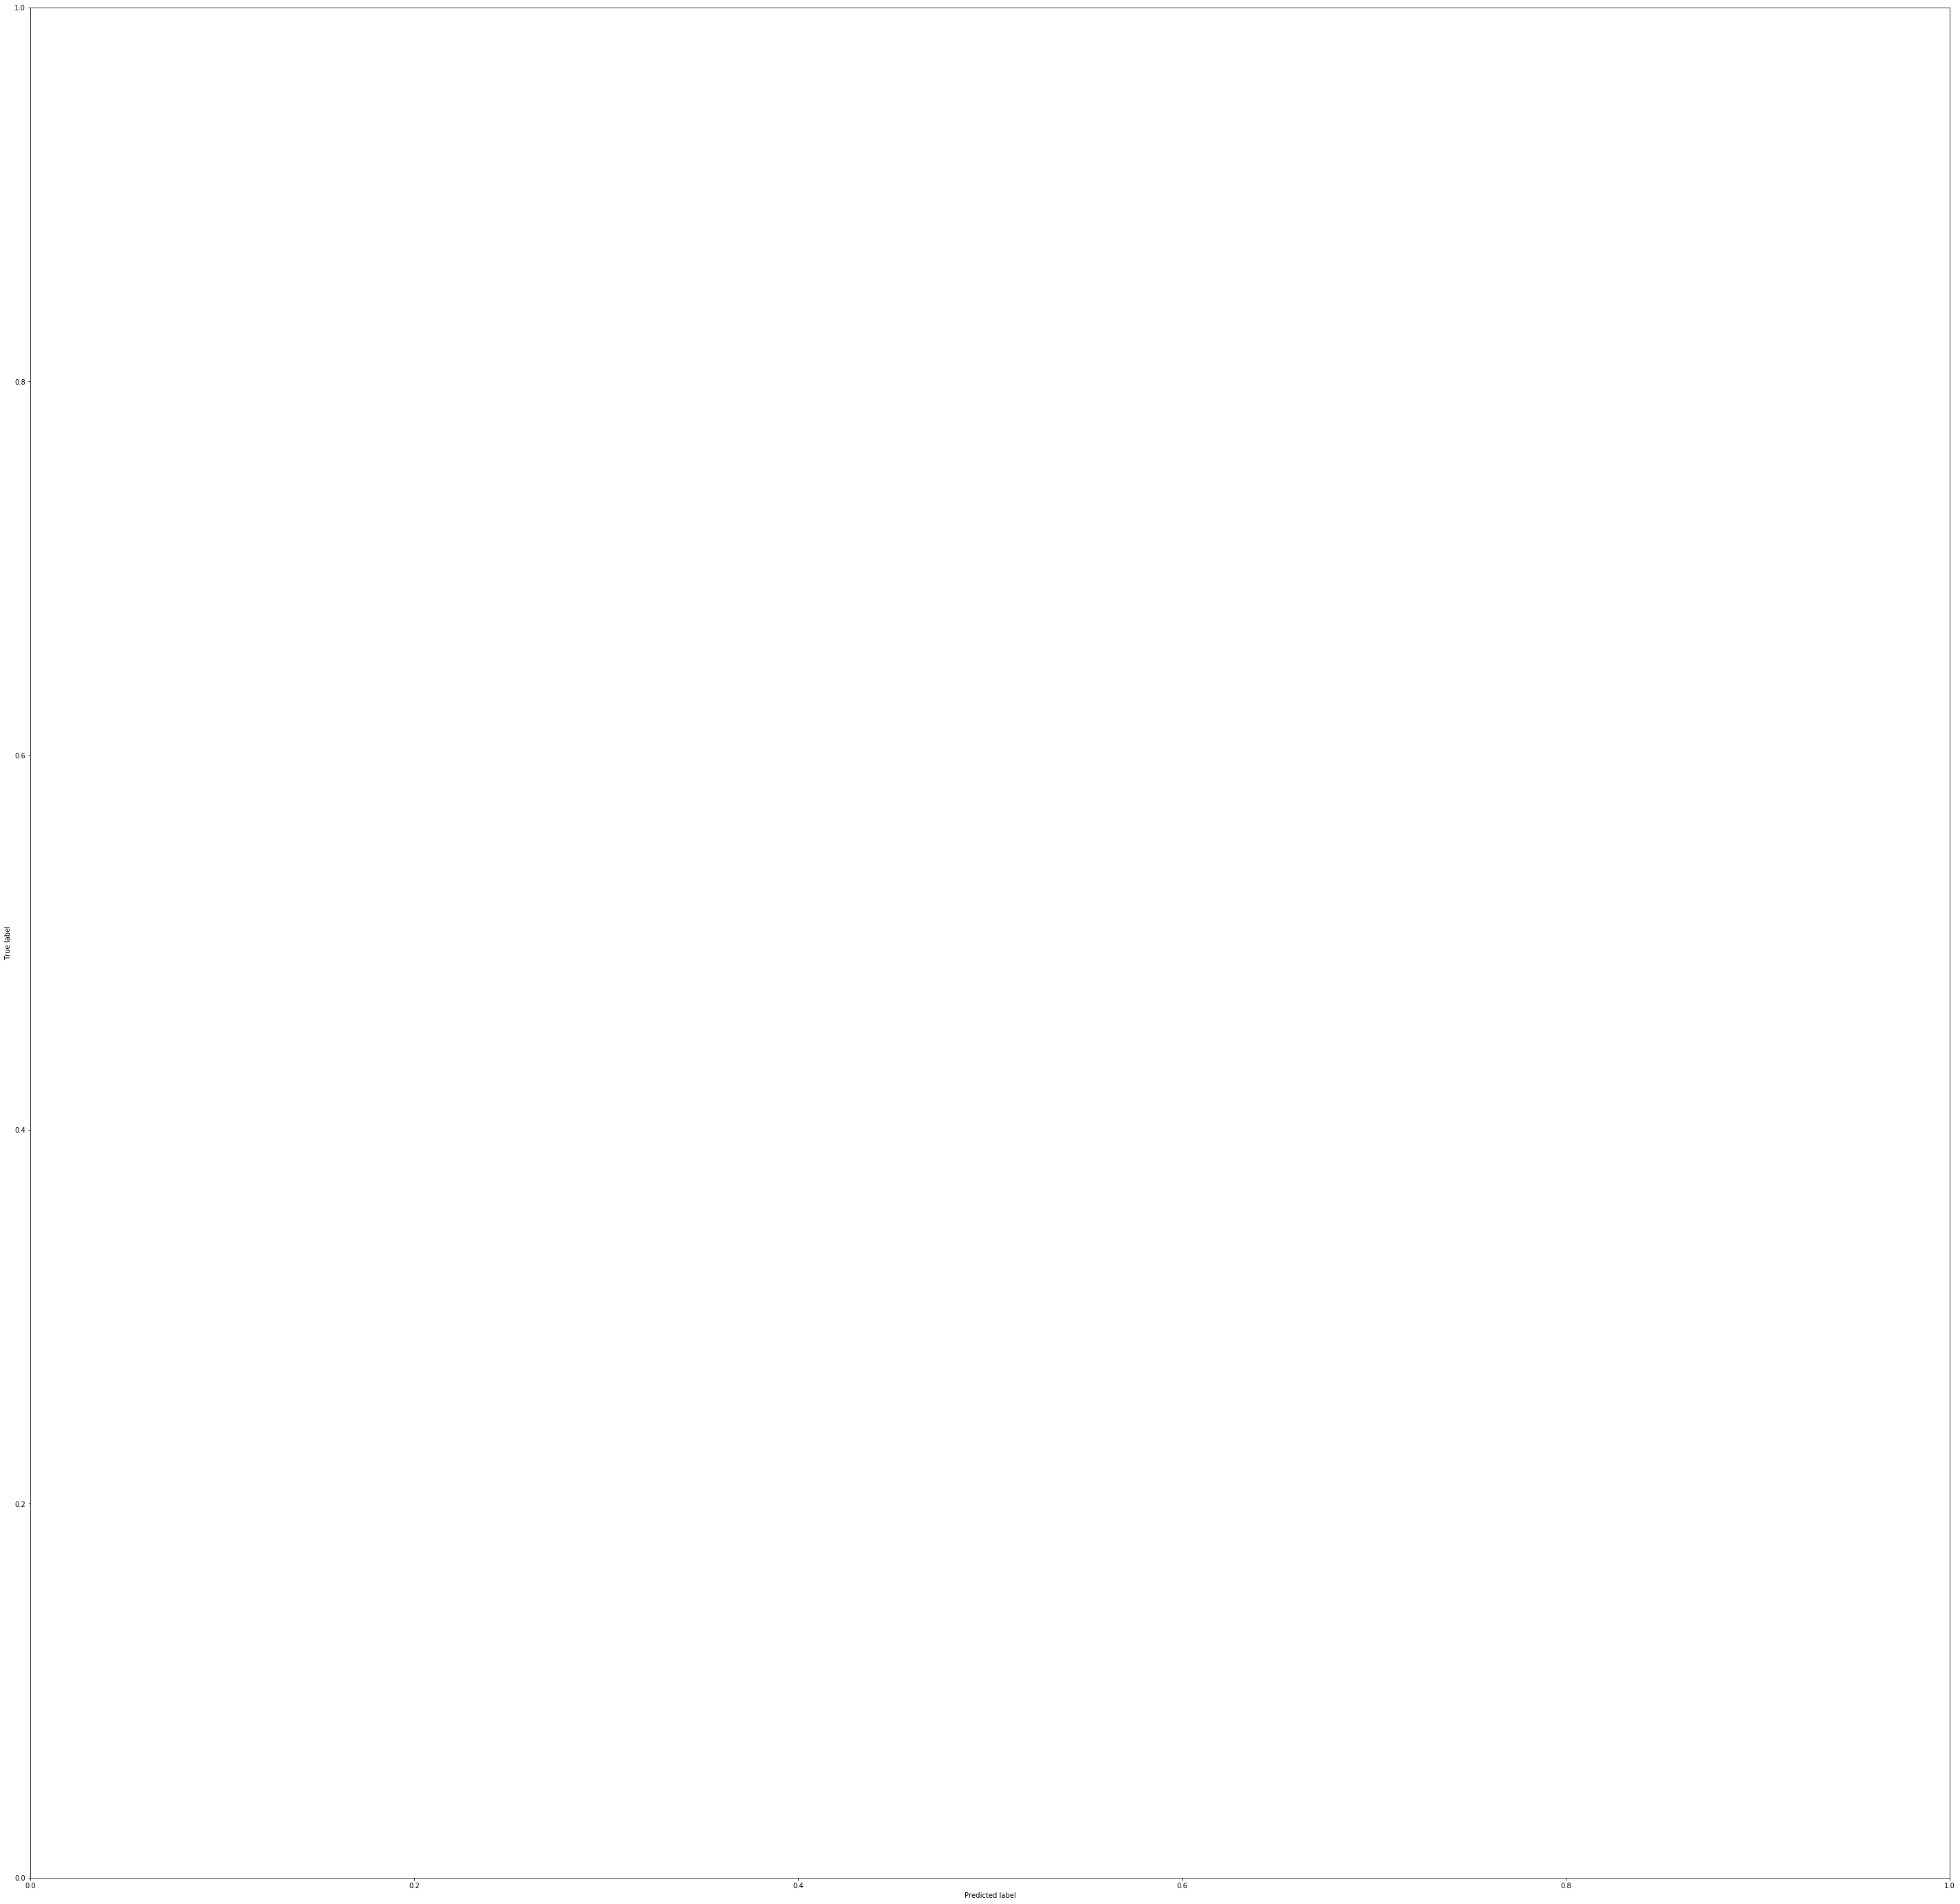

In [143]:
plot_confusion_matrix(cm, cate)